<div style='text-align: center;'><font color="#000080" size=4><b>Electric Vehicles Market Size Analysis using Python

<font size=2><font color='blue' size=3>**Introduction**</font><br>
Introduction to the EV Market Analysis Project
The global shift toward sustainable energy has propelled the demand for electric vehicles (EVs). This dataset encompasses detailed information about EV registrations in the United States, offering insights into trends in adoption over years, geographic distribution, consumer preferences, and manufacturer dominance. This project aims to uncover valuable insights into EV market dynamics and consumer behavior through thorough data analysis and visualization.

In [1]:
## basic functions to help formating
from IPython.display import display, HTML

def tab_info(text, color='grey', size=1):
    """
    Display a styled heading in a Jupyter Notebook.
    Head1 displays basic info about the tab where I can't put the heading 
    
    Parameters:
    - text (str): The text to display as a heading.
    - color (str): The color of the heading text. Default is 'cyan'.
    - size (int): The font size of the heading. Default is 2.
    """
    display(HTML(f"<font color='{color}' size={size}>{text}</font>"))
    
def styled_head(text, color="#FFD700", size=3, bold=True):
    'Displays Heading'
    if bold:
        text = f"<b>{text}</b>"
    display(HTML(f"<font color='{color}' size={size}>{text}</font>"))

def todo(text, color='green', size=2):
    display(HTML(f"<font color='{color}' size={size}>{text}"))
    
def insight(text, color='purple', size=2):
    display(HTML(f"<font color='{color}' size={size}>{text}"))
    
    
tab_info("Importing Important Libraries...")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
tab_info('Importing the Dataset...')

<font size=2><font color=blue size=3>**About the Dataset**</font><br>
The dataset provides detailed information about electric vehicle (EV) registrations in the United States. It includes various attributes like the make, model, electric range, model year, and geographic details such as the county and city of registration. Here's a brief overview of its structure:<br>
<ul><font size=2>
<li>Geographic Information: Includes County and City columns, allowing for regional analysis of EV adoption patterns.</li>
<li>Vehicle Specifications: Contains details like Make, Mode|l, Model Year, and Electric Range, offering insights into consumer preferences and advancements in EV technology over time.</li>
<li>Registration Data: Features VIN (1-10), a unique identifier for vehicles, to calculate registration counts and identify the most popular vehicles.</li>
<li>Type of EVs: Differentiates between BEVs (Battery Electric Vehicles) and PHEVs (Plug-in Hybrid Electric Vehicles) in the Electric Vehicle Type column.</li></font></ul><br><font size=2>This rich dataset serves as a robust foundation for analyzing trends in EV adoption, manufacturer dominance, and regional preferences, helping to uncover actionable insights for stakeholders.

In [3]:
df= pd.read_csv('Electric_Vehicle_Population_Data.csv')
insight(f"<b>The Dataset has {df.shape[0]:,} rows and {df.shape[1]} columns")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [35]:
df.dropna(inplace=True)
tab_info("Deleting rows with No values in them")
df.shape

(177473, 17)

In [36]:
print(df.State.value_counts(), "\n""Number of Unique value in the State Column:", df.State.nunique())
insight("<b>The entire dataset represents a single state, Washington, in the USA.")
todo("""<b>For the task of market size of electric vehicles analysis, we can explore the following areas:</b><br>1. EV Adoption Over Time: Analyze the growth of the EV population by model year.<br>2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).<br>3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).<br>4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.<br>5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.<br>6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.""")
print('\n')
styled_head("EV Adoption Over Time")
tab_info("""<b>Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:""")

WA    177473
Name: State, dtype: int64 
Number of Unique value in the State Column: 1


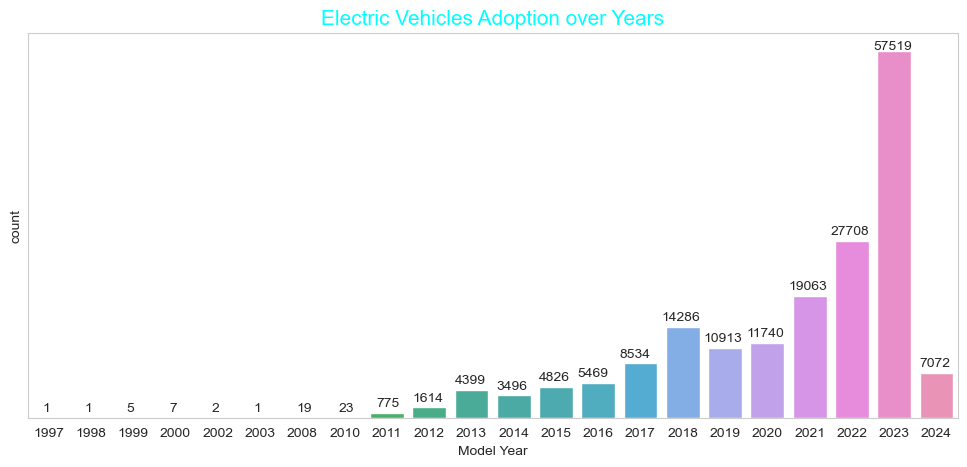

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Model Year')

## for adding Values on top of each bar
for idx, patch in enumerate(plt.gca().patches):
    count= patch.get_height()
    if count<500:
        plt.annotate(count, xy=(idx-.15, count+1000))
    elif count in (range(500, 1000)):
        plt.annotate(count, xy=(idx-.25, count+1000))
    elif count in (range(1000,5000)):
        plt.annotate(count, xy=(idx-.4, count+1000))
    elif count==7072:
        plt.annotate(count, xy=(idx-.4, count+1000))
    else:
        if count == 57519:
            plt.annotate(count, xy=(idx-.5, count+300))
        else:
            plt.annotate(count, xy=(idx-.5, count+1000))
            
plt.title('Electric Vehicles Adoption over Years', color='cyan', size=15)
plt.yticks([])
plt.show()

In [38]:
insight("From the above count plot, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.")

In [39]:
tab_info("<b>Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:")
styled_head("Geographical Distribution")

In [40]:
tab_info('Top 3 Counties by Electric Vehicle Registration Count')
top_3_county= df.groupby('County')['VIN (1-10)'].count().reset_index().sort_values(by=
                                                'VIN (1-10)', ascending=False).head(3)
top_3_county

,County,VIN (1-10)
16,King,92740
30,Snohomish,21001
26,Pierce,13782


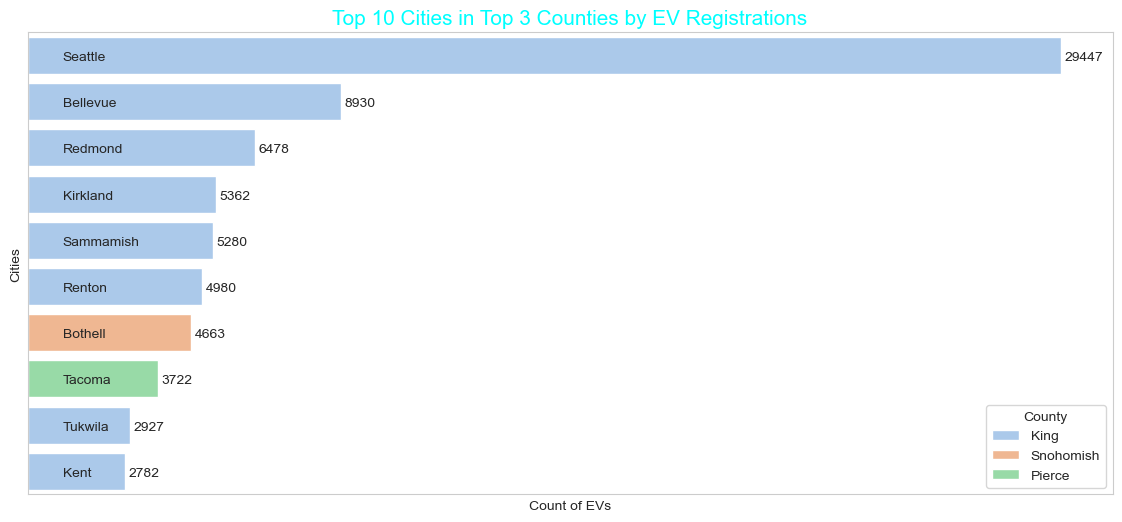

In [41]:
### Sorting the cities (King, Snohomish, Pierce) based on the number of EVs 
### and select the top 10 cities with the highest registrations.
top_10_cities_of_top_3_county= df[df['County'].isin(top_3_county['County'].values)
].groupby(['City', 'County'])['VIN (1-10)'].count().reset_index().sort_values(by ='VIN (1-10)', ascending=False).head(10)

## ploting chart
plt.figure(figsize=(14,6))
sns.barplot(data= top_10_cities_of_top_3_county, x='VIN (1-10)', y='City', hue='County', dodge=False, palette="pastel")

# for adding values on the right of each horizontal bar
for idx, value in enumerate(top_10_cities_of_top_3_county['VIN (1-10)']):
    plt.annotate(value, xy=(value+100, idx+.1))
for idx, value in enumerate(top_10_cities_of_top_3_county['City']):
    plt.annotate(value, xy=(1000, idx+.1))

plt.title('Top 10 Cities in Top 3 Counties by EV Registrations', color='cyan', size=15)
plt.yticks([]), plt.xticks([])
plt.xlabel('Count of EVs')
plt.ylabel('Cities')
plt.legend(title= 'County')

plt.show()
insight("The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:<br><b>Seattle,</b> which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.<br><b>Bellevue and Redmond</b>, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.<br>City in Snohomish County, <b>Bothell</b>, show moderate EV registrations.<br><b>Tacoma,</b> representing Pierce County, has the fewest EV registrations among the cities listed<br>The majority of cities shown are from <b>King County</b>, which seems to dominate EV registrations among the three counties.<br><b>Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.")

In [42]:
styled_head('EV Types')
todo("Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions.")

In [43]:
ev_types= df['Electric Vehicle Type'].value_counts().reset_index().sort_values(by='Electric Vehicle Type')
ev_types

,index,Electric Vehicle Type
1,Plug-in Hybrid Electric Vehicle (PHEV),38526
0,Battery Electric Vehicle (BEV),138947


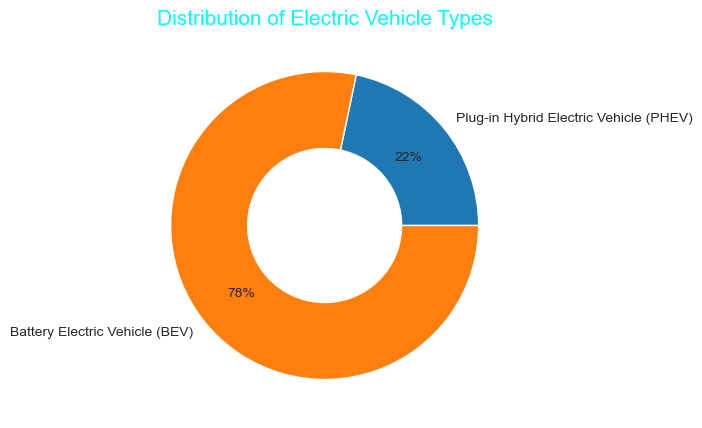

In [44]:
plt.figure(figsize=(10,5))
plt.pie(labels= ev_types['index'], x=ev_types['Electric Vehicle Type'], 
        autopct="%.f%%", pctdistance= .7, wedgeprops=dict(width=.5))
plt.title('Distribution of Electric Vehicle Types',color='cyan', size=15)
plt.show()

insight("The above graph shows that <b>BEVs are more popular</b> or preferred over PHEVs among the electric vehicles registered in the United States.")
print('\n')
styled_head('Make and Model Popularity')
todo("Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.")

In [45]:
top_10_makers= df['Make'].value_counts().head(10)
top_10_makers

TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: Make, dtype: int64

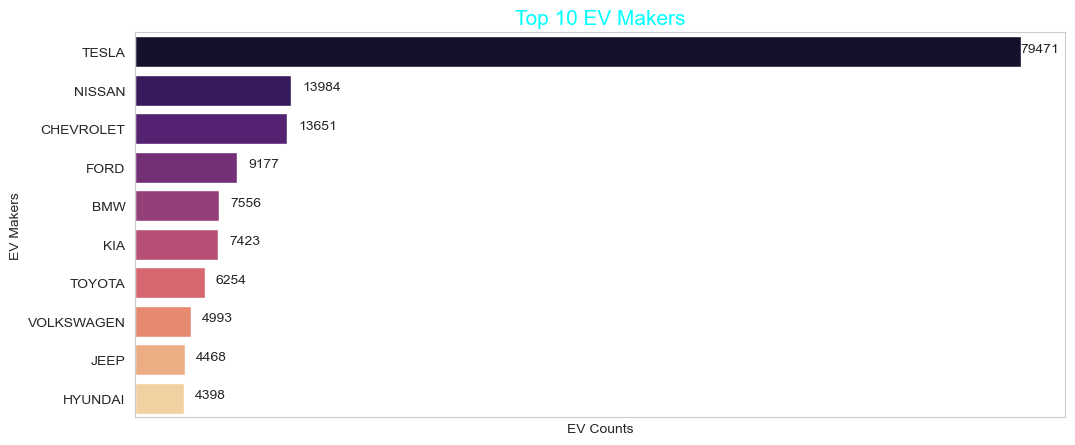

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(x=top_10_makers.values, y=top_10_makers.index, palette="magma")
for idx, value in enumerate(top_10_makers.values):
    if value==79471:
        plt.annotate(value, xy=(value, idx))
    else:
        plt.annotate(value, xy=(value+1000, idx))
plt.title('Top 10 EV Makers', color='cyan', size=15)
plt.xlabel('EV Counts')
plt.ylabel('EV Makers')
plt.xticks([])
plt.show()

In [47]:
insight("The above chart shows that:<br><b>TESLA</b> leads by a substantial margin with the highest number of vehicles registered.<br><b>NISSAN</b> is the second most popular manufacturer, followed by <b>CHEVROLET</b>, though both have significantly fewer registrations than TESLA.<br><b>FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI</b> follow in decreasing order of the number of registered vehicles.")
todo("Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:")

In [48]:
# selecting and filtering the dataset for top 3 EV manufactures based on number of vehicles registered
df_top_3_maker= df[df['Make'].isin(top_10_makers.index[:3])]
# selecting the top 10 models from df_top_3_maker based on registration count
top_models= df_top_3_maker.groupby(['Make', 'Model']).size().sort_values(
                        ascending=False).reset_index(name="No_of_registered_vehicles").head(10)
top_models

,Make,Model,No_of_registered_vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


In [49]:
plt.figure(figsize=(12,7))
fig = px.treemap(top_models, 
                 path=['Make', 'Model'],  # Hierarchy: Make -> Model
                 values='No_of_registered_vehicles',  # Size of boxes
                 color='No_of_registered_vehicles',  # Color by vehicle count
                 color_continuous_scale='rainbow')  # Color scale

# Update the layout
fig.update_layout(title='Treemap of Vehicle Registrations by Model',title_font= dict(color='cyan', size=20))

fig.update_traces(hovertemplate='<b>%{label}</b><br>' +  # Shows Make and Model as the label
                  'Vehicles: %{value}<br>' +  # Shows the count of vehicles
                  '<extra></extra>'  # Removes extra info like sum and parent
                 )
# Show the plot
fig.show()

<Figure size 1200x700 with 0 Axes>

In [50]:
insight("The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:<br><ul><li>TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.</li><li>NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.</li><li>TESLA’s MODEL S and MODEL X also have a significant number of registrations.</li><li>CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.</li><li>NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.</li></ul>")

In [51]:
styled_head("Electric Range Analysis")
todo("Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:")

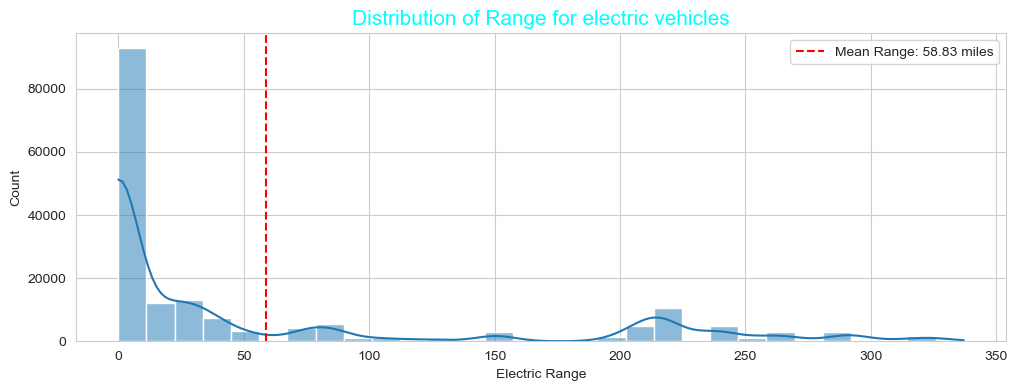

In [55]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Range for electric vehicles', color='cyan', size=15)
# add a verical line for mean of Electric Range
plt.axvline(df['Electric Range'].mean(), 
            color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

insight("The above graph shows the mean electric range. Key observations from the graph include:<br><ul><li>There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.</li><li>The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.</li><li>The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.</li><li>Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.</li></ul>It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.")
todo("Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):")

In [56]:
range_over_years= df.groupby('Model Year')['Electric Range'].mean().reset_index()
range_over_years

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


In [59]:
plt.figure(figsize=(12,4))
fig = px.line(range_over_years, 
              x="Model Year", y="Electric Range", markers=True, 
              title="Electric Range Over Years by Model",
              labels={"Electric Range": "Average Electric Range", "Model Year": "Year"})
# Adjust layout for better readability
fig.update_layout(title_font=dict(color='cyan', size=20),title_x=0.5)
fig.show()

<Figure size 1200x400 with 0 Axes>

In [60]:
insight("The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:<br><br><ul><li>There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.</li><li>There is a noticeable peak around the year 2020 when the average range reaches its highest point.</li><li>Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.</li><li>After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.</li><li>The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.")

<font size=3 color=blue>**Summary**</font><br>
<font size=2>This analysis demonstrates the dynamic growth of the EV market, with notable trends in geographical preferences, manufacturer dominance, and technological advancements. The findings serve as a foundation for stakeholders to understand consumer behavior and make informed decisions to drive the future of electric mobility.</font>